In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

In [5]:
# https://www.tensorflow.org/get_started/mnist/beginners
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [7]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [8]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [9]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [10]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [11]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 2.835604559
Epoch: 0002, Cost: 1.060486306
Epoch: 0003, Cost: 0.836493273
Epoch: 0004, Cost: 0.733177054
Epoch: 0005, Cost: 0.669140395
Epoch: 0006, Cost: 0.624411476
Epoch: 0007, Cost: 0.590043223
Epoch: 0008, Cost: 0.563619191
Epoch: 0009, Cost: 0.541243040
Epoch: 0010, Cost: 0.522313864
Epoch: 0011, Cost: 0.506151043
Epoch: 0012, Cost: 0.492651506
Epoch: 0013, Cost: 0.479880342
Epoch: 0014, Cost: 0.468596230
Epoch: 0015, Cost: 0.458903061
Learning finished
Accuracy:  0.8957
Label:  [5]
Prediction:  [5]


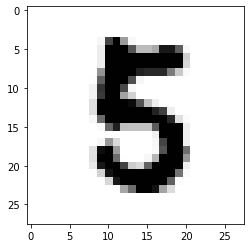

In [20]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  # Tranining cycle
  for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

  print("Learning finished")

  # Test the model using test sets
  print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

  # Get one and predict
  r = random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
  print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}))

  plt.imshow(mnist.test.images[r : r+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
  plt.show()

In [13]:
avg = 0
for i in range(5):
  avg += i
print(avg/5)

2.0


In [15]:
avg = 0
for i in range(5):
  avg += i / 5
print(avg)

2.0


In [18]:
random.randint(0, 1)

1

In [19]:
mnist.test.num_examples

10000